<a href="https://colab.research.google.com/github/01fe21bec073/machine-learning-with-pyhton/blob/main/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate linear regression(random values)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn


create some data with approximately the relationship  y=2x+1 , with normally distributed errors.

In [3]:
np.random.seed(0)#always generates same random nos. during run time
n = 20              #no of data pts
x = np.linspace(0,10,n)#creates array b/w 0-10
y = x*2 + 1 + 1*np.random.randn(n)#mean=0,std diviation 1
print(x)
print(y)


[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[ 2.76405235  2.45278879  4.08400114  6.39878794  7.07808431  5.28588001
  8.26587789  8.21706384  9.31783378 10.88428271 11.67035936 14.03322088
 14.39261667 14.80588554 16.18070534 17.12314801 19.33618434 18.68957858
 20.26043612 20.14590426]


In [4]:
from sklearn.linear_model import LinearRegression

Now we can fit a line through the data points (x, y):

The linear regression tries to minimize the sum of squared errors  ∑i(y[i]−y^[i])2 ; this is the sum of the squared lengths of the red line segments in the above plot. The estimated values  y^[i]  are denoted by yfit[i] in the below code.

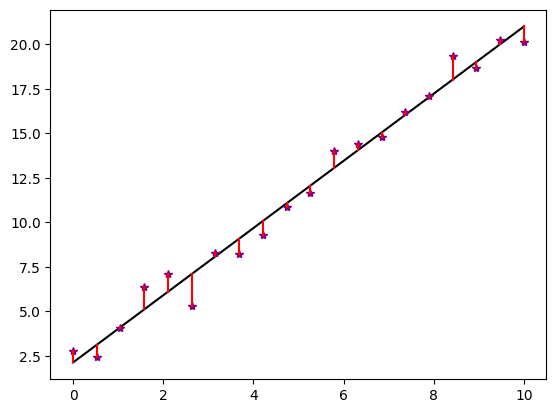

In [5]:
model=LinearRegression(fit_intercept=True)#creates LR and estimates slope and intercept
model.fit(x[:,np.newaxis],y)#takes 2 arg, calls fit ,model trained to create beat-fit
#x->reshaping x from1d to 2d (colunmn vector)
xfit=np.linspace(0,10,100)
yfit=model.predict(xfit[:,np.newaxis])
plt.plot(xfit,yfit,color="black")
plt.plot(x,y,'*',color="purple")
plt.plot(np.vstack([x,x]),np.vstack([y,model.predict(x[:,np.newaxis])]),color="red")


In [6]:
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Parameters: [1.88627741] 2.1379475205341354
Coefficient: 1.8862774144823005
Intercept: 2.1379475205341354


In this case, the coefficient is the slope of the fitted line, and the intercept is the point where the fitted line intersects with the y-axis.

## Multivariate linear regression

So, in summary, the code fits a linear regression model (model2) without an intercept term to the data in x. The coef_ attribute of the model contains the coefficients of the linear equation, and since fit_intercept is False, the intercept is explicitly set to zero.

In [7]:
sample1=np.array([1,2,3])   # The three explanatory variables have values 1, 2, and 3, respectively
sample2=np.array([4,5,6])   # Another example of values of explanatory variables
sample3=np.array([7,8,10])   # ...
y=np.array([15,39,66]) + np.random.randn(3)   # For values 1,2, and 3 of explanatory variables, the value y=15 was observed, and so on.

In [ ]:
model2=LinearRegression(fit_intercept=False)
x=np.vstack([sample1,sample2,sample3])
model2.fit(x, y)
model2.coef_, model2.intercept_

(array([5.69493795e+00, 3.36972233e+00, 4.20919214e-03]), 0.0)

In [ ]:
b=model2.coef_[:, np.newaxis]
print("x:\n", x)
print("b:\n", b)
print("y:\n", y[:, np.newaxis])
print("product:\n", np.matmul(x, b))
#plt.plot(x,y,color="black")

x:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
b:
 [[5.69493795e+00]
 [3.36972233e+00]
 [4.20919214e-03]]
y:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]
product:
 [[12.44701018]
 [39.6536186 ]
 [66.8644362 ]]


## unsupervised learning(k-means clustring)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
players=pd.read_csv("/content/drive/MyDrive/players_22.csv")

<ipython-input-8-c9890fd198cb>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv("/content/drive/MyDrive/players_22.csv")


In [ ]:
players


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [ ]:
features=["overall","potential","wage_eur","value_eur","age"]#4 features


In [ ]:
players = players.dropna(subset=features)
#dropna function is used to remove missing or "NaN" (Not a Number) values from a DataFrame or Series.
# It plays a crucial role in data cleaning and preprocessing

In [ ]:
data=players[features].copy()#cpy the featuers
print(data)

       overall  potential  wage_eur    value_eur  age
0           93         93  320000.0   78000000.0   34
1           92         92  270000.0  119500000.0   32
2           91         91  270000.0   45000000.0   36
3           91         91  270000.0  129000000.0   29
4           91         91  350000.0  125500000.0   30
...        ...        ...       ...          ...  ...
19234       47         52    1000.0      70000.0   22
19235       47         59     500.0     110000.0   19
19236       47         55     500.0     100000.0   21
19237       47         60     500.0     110000.0   19
19238       47         60     500.0     110000.0   19

[19165 rows x 5 columns]


k-means clustering
1.scale the data (scaling all min and max values to rage 1-10)

2.inititize random centriod

3.label each data point

4.update the centroids

5.repeat steps 3 and 4 until centroids stop changing


In [ ]:
data=((data-data.min())/(data.max()-data.min()))* 9 + 1
#min value=1 max=10

In [ ]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.head()#first colums

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [ ]:
centroid=data.apply(lambda x:float(x.sample()))#create single centroid
# .apply will iterate through each column in the data
# (x.sample) will select a single random value from each column
# x:float ->to get the value as a single no.,as x.pandas returns series

In [ ]:
print(centroid)

overall      2.369565
potential    6.478261
wage_eur     1.012876
value_eur    1.044817
age          3.333333
dtype: float64


In [ ]:
#to get multiple centroids
def random_centroids(data,k):
  centroids=[]
  for i in range(k):
     centroid=data.apply(lambda x:float(x.sample()))
     centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [ ]:
centroids=random_centroids(data,5)#k = 5


In [ ]:
centroids #each row is a different feature
          #column are centroids

,0,1,2,3,4
overall,4.521739,5.695652,3.347826,2.565217,4.913043
potential,6.478261,6.478261,3.934783,3.543478,5.500000
wage_eur,1.038627,1.038627,1.476395,1.038627,2.609442
value_eur,1.032058,1.059895,1.045976,1.036698,1.106288
age,4.000000,6.333333,1.666667,1.333333,4.666667


A function that labels each data pt according to the cluster centers
1.itll compare each player of the dataset to the cluster center

2.using euclidian formula to calculate distance

In [ ]:
#to calculate the distance from teh player to the k point
distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
print(distances)

               0          1          2          3          4
0      11.345892  10.415896  13.331535  14.284923  10.214475
1      10.953027  10.158431  12.863799  13.777197   9.999671
2       9.933591   8.736744  12.208545  13.181341   8.786724
3      10.872711  10.321930  12.553517  13.446441   9.963868
4      12.246942  11.694762  13.752052  14.640963  11.142623
...          ...        ...        ...        ...        ...
19234   6.109748   7.555729   3.608194   3.009563   5.996776
19235   5.367265   7.296171   2.609416   1.800385   5.611856
19236   5.719275   7.350211   3.137140   2.471020   5.742428
19237   5.240968   7.203771   2.542544   1.746421   5.525933
19238   5.240968   7.203771   2.542544   1.746421   5.525933

[19165 rows x 5 columns]


In [ ]:
distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
distances.idxmin(axis=1)
#now vll have clusteres assigned values for reach player

0        4
1        4
2        1
3        4
4        4
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [ ]:
def get_labels(data,centroids):
  distances=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)


In [ ]:
label=get_labels(data,centroids)

In [ ]:
label.value_counts()


0    6967
4    4289
1    3704
2    3268
3     937
dtype: int64

now we split the data by the labels

 the calculated geometric mean of each
feature gives,

new centroid   ->

In [ ]:
# update the centroid based on who is in the cluster
data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean()))

#geommetric mean
#colums are the features
#rows are the centroids

,overall,potential,wage_eur,value_eur,age
0,3.206838,4.928473,1.028505,1.026614,2.518708
1,5.806043,6.497993,1.420001,1.285501,3.596161
2,4.784633,4.506962,1.118904,1.044980,5.472247


In [ ]:
# update the centroid based on who is in the cluster
def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

#geommetric mean
# BY adding .T to the above equation...
#colums are the centroids
#rows are the features
# which is similar to random centroid function

In [ ]:
#function to plot the cluster assignments to plot each step at each iteration
from sklearn.decomposition import PCA #PCA->principle composition analysis,make 5D (5 column data) help visualise in 2D data
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data,labels,centroids,iteration):
  pca=PCA(n_components=2)#transform the data to 2d
  data_2d=pca.fit_transform(data)
  centroids_2d=pca.transform(centroids.T)
  clear_output(wait=True)# ploting the clusters
  plt.title(f'Iteration{iteration}')#and calling the function
  plt.scatter(x=data_2d[:,0], y=data_2d[:,1],c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

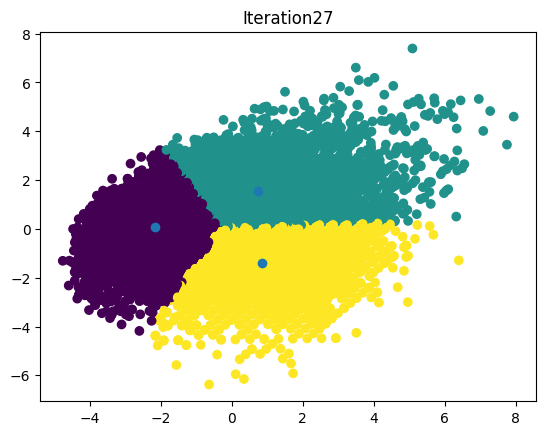

In [ ]:
max_iterations = 100
k=3

centroids= random_centroids(data,k)
old_centroids= pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids=centroids

  labels=get_labels(data,centroids)
  centroids=new_centroids(data,labels,k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1



In [ ]:
centroids

,0,1,2
overall,4.781960,5.807503,3.205672
potential,4.506813,6.497870,4.930905
wage_eur,1.118498,1.420500,1.028564
value_eur,1.044909,1.285685,1.026655
age,5.467648,3.598215,2.514741


In [ ]:
players[labels==2][["short_name"]+features]

,short_name,overall,potential,wage_eur,value_eur,age
199,Pepe,82,82,14000.0,5500000.0,38
284,Joaquín,81,81,23000.0,8500000.0,39
292,José Fonte,81,81,30000.0,4600000.0,37
388,G. Buffon,80,80,18000.0,2300000.0,43
509,Iniesta,79,79,10000.0,5500000.0,37
...,...,...,...,...,...,...
18890,S. Haokip,51,51,500.0,60000.0,28
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['overall'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['potential'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['wage_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['value_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['overall'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['potential'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['wage_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['value_eur'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['overall', 'potential'], ['potential', 'wage_eur'], ['wage_eur', 'value_eur'], ['value_eur', 'age']]], **{})
chart